In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import time
from math import pi
from datetime import datetime  as dt
import matplotlib
import networkx as nx

# Import API key
from api_keys import api_key
single_city_url = "http://api.openweathermap.org/data/2.5/weather?"

## Bokeh imports

In [2]:
#import bokeh for analysis of datasets.
from bokeh.models import DatetimeTickFormatter
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models.tools import HoverTool
import bokeh.palettes as bcolors
from bokeh.transform import factor_cmap
import matplotlib.dates as mdates

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
covid = "covid.json"

In [5]:
covid_df = pd.read_json(covid)

In [6]:
covid_df

,date,state,fips,cases,deaths,new_cases,new_deaths,country,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,2020-02-15,Washington,53,1,0,0,0,United States,2,-1,8,8,-3,0
1,2020-02-16,Washington,53,1,0,0,0,United States,15,3,19,5,-1,-1
2,2020-02-17,Washington,53,1,0,0,0,United States,12,2,63,-7,-35,6
3,2020-02-18,Washington,53,1,0,0,0,United States,5,2,52,7,-4,0
4,2020-02-19,Washington,53,1,0,0,0,United States,4,3,60,7,-2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2020-03-31,West Virginia,54,162,1,17,0,United States,-37,-15,-14,-28,-42,15
1636,2020-04-01,West Virginia,54,191,2,29,1,United States,-34,-10,-14,-26,-43,15
1637,2020-04-02,West Virginia,54,217,2,26,0,United States,-35,-10,-2,-31,-42,16
1638,2020-04-03,West Virginia,54,242,2,25,0,United States,-35,-10,8,-36,-42,17


## data cleaning

In [7]:
covcopy = covid_df.copy()

In [8]:
state_list = covid_df['state'].unique()

In [9]:
state_list

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'West Virginia'], dtype=object)

### Linear Regression

- Examine relationships of the data
-----------------------
The cases in each state will be analysed with the scipy.stats linear regression package to determine what relationships may exist.


- Start with New York State
-----------------------
Due to significant population density New York will be examined first.

### New York State Data

In [10]:
state_ind = covid_df.loc[covid_df['state'] == "New York"]

In [11]:
state_ind_newcase = state_ind['new_cases']
ncase_range = len(state_ind_newcase)
x_axis = np.arange(0, ncase_range, 1)

In [12]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, state_ind_newcase)
fit = slope * x_axis + intercept

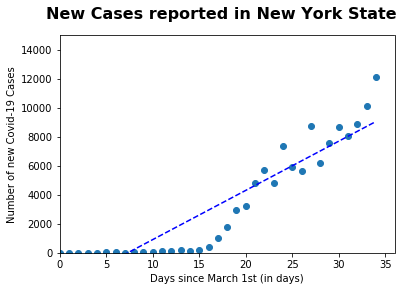

In [13]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("New Cases reported in New York State", fontsize=16, fontweight="bold")

ax.set_xlim(0, ncase_range+1)
ax.set_ylim(0, 15000)

ax.set_xlabel("Days since March 1st (in days)")
ax.set_ylabel("Number of new Covid-19 Cases")

ax.plot(x_axis, state_ind_newcase, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

### Oregon State Data

In [14]:
state_ind_OR = covid_df.loc[covid_df['state'] == "Oregon"]

In [15]:
state_ind_or_newcase = state_ind_OR['new_cases']
ncase_or_range = len(state_ind_or_newcase)
x_or_axis = np.arange(0, ncase_or_range, 1)

In [16]:
# Set line
(slope_or, intercept_or, _, _, _) = linregress(x_or_axis, state_ind_or_newcase)
fit_or = slope_or * x_or_axis + intercept_or

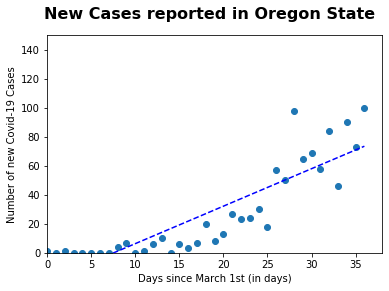

In [17]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("New Cases reported in Oregon State", fontsize=16, fontweight="bold")

ax.set_xlim(0, ncase_or_range+1)
ax.set_ylim(0, 150)

ax.set_xlabel("Days since March 1st (in days)")
ax.set_ylabel("Number of new Covid-19 Cases")

ax.plot(x_or_axis, state_ind_or_newcase, linewidth=0, marker='o')
ax.plot(x_or_axis, fit_or, 'b--')

plt.show()

In [18]:
state_ind_CA = covid_df.loc[covid_df['state'] == "California"]

In [19]:
state_ind_ca_newcase = state_ind_CA['new_cases']
ncase_ca_range = len(state_ind_ca_newcase)
x_ca_axis = np.arange(0, ncase_ca_range, 1)

In [20]:
# Set line
(slope_ca, intercept_ca, _, _, _) = linregress(x_ca_axis, state_ind_ca_newcase)
fit_ca = slope_ca * x_ca_axis + intercept_ca

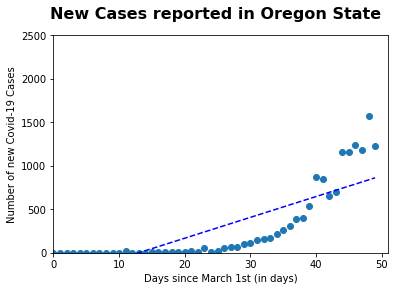

In [21]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("New Cases reported in Oregon State", fontsize=16, fontweight="bold")

ax.set_xlim(0, ncase_ca_range+1)
ax.set_ylim(0, 2500)

ax.set_xlabel("Days since March 1st (in days)")
ax.set_ylabel("Number of new Covid-19 Cases")

ax.plot(x_ca_axis, state_ind_ca_newcase, linewidth=0, marker='o')
ax.plot(x_ca_axis, fit_ca, 'b--')

plt.show()

## Preliminary Conclusions
- The relationship is not linear as the fit is not very descriptive of the data.